## Predykcja przewlekłej choroby nerek na podstawie danych medycznych pacjentów

**Autorzy**: Diana Kalyniak (100913), Zuzanna Winiarska (101020)

**Zbiór danych**: Chronic Kidney Disease (UCI Machine Learning Repository)

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

df = X.copy()
df['class'] = y
print(df.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


## **1. Definicja problemu predykcyjnego i charakterystyka zbioru**

### **1.1. Cel analizy**

Celem niniejszej analizy jest **identyfikacja pacjentów z przewlekłą chorobą nerek (CKD — Chronic Kidney Disease)** na podstawie dostępnych danych klinicznych oraz ocena skuteczności różnych modeli uczenia maszynowego w przewidywaniu tej choroby.

Przewlekła choroba nerek to poważna i postępująca choroba, która może prowadzić do niewydolności nerek i konieczności dializ lub przeszczepu. Wczesna diagnoza ma kluczowe znaczenie dla zapobiegania powikłaniom i poprawy jakości życia pacjentów. Niestety, objawy CKD są często niespecyficzne, a wiele przypadków pozostaje niezdiagnozowanych we wczesnym stadium.

Dzięki zastosowaniu eksploracyjnej analizy danych oraz metod uczenia maszynowego, celem jest:

* **Zrozumienie struktury zbioru danych** oraz relacji pomiędzy zmiennymi klinicznymi a obecnością choroby nerek;
* **Wykrycie istotnych cech** (takich jak poziom kreatyniny, hemoglobiny czy obecność komórek ropy), które mogą mieć wpływ na diagnozę;
* **Zbudowanie modeli predykcyjnych**, które będą w stanie klasyfikować nowych pacjentów jako chorych lub zdrowych na podstawie ich danych medycznych;
* **Ocena skuteczności modeli** przy użyciu wskaźników takich jak dokładność, czułość, specyficzność oraz AUC-ROC, aby zidentyfikować najlepsze podejście;
* **Kalibracja modeli** w celu poprawy ich niezawodności w praktycznych zastosowaniach medycznych.

Analiza ma również na celu pokazanie praktycznego zastosowania eksploracji danych i uczenia maszynowego w kontekście rzeczywistych problemów medycznych oraz zademonstrowanie procesu przygotowania danych, czyszczenia, eksploracji, modelowania i interpretacji wyników.

Ostatecznym celem projektu jest **opracowanie rzetelnego narzędzia wspomagającego lekarzy** w procesie diagnostycznym oraz zwiększenie świadomości dotyczącej znaczenia danych klinicznych w opiece zdrowotnej.

### **1.2. Typ problemu**

Analizowany problem należy do dziedziny **uczenia nadzorowanego** i jest klasyfikacją binarną.

* **Zadanie:** Przewidywanie, czy dany pacjent cierpi na przewlekłą chorobę nerek (CKD) czy nie.
* **Etykiety:**

  * `ckd` (choroba obecna) — klasa pozytywna
  * `notckd` (choroba nieobecna) — klasa negatywna
* **Dane wejściowe:** Zbiór cech medycznych i demograficznych pacjentów, takich jak wiek, ciśnienie krwi, poziom kreatyniny, hemoglobiny, wyniki badań krwi i moczu itp.
* **Cel:** Zbudować model, który na podstawie tych cech potrafi przypisać pacjenta do jednej z dwóch klas.

Jest to klasyczny problem klasyfikacji binarnej, gdzie celem jest rozróżnienie między dwoma stanami zdrowotnymi, wykorzystując dane medyczne pacjentów.

### **1.3. Charakterystyka danych**

Zbiór danych **Chronic Kidney Disease** zawiera informacje medyczne dotyczące 400 pacjentów, zebrane w celu klasyfikacji obecności przewlekłej choroby nerek (CKD). Dane mają charakter **multivariate** i obejmują **24 cechy opisujące zarówno parametry kliniczne, jak i wyniki badań laboratoryjnych**, a także jedną zmienną docelową (`class`).

In [ ]:
# Podstawowy przegląd danych
print("Podstawowe informacje o zbiorze danych:")
print(df.info())

Podstawowe informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21 

### **1.4. Typy zmiennych**

#### **Cechy liczbowe**

Zmiennie te opisują pomiary fizyczne lub wyniki badań laboratoryjnych.

* `age` – wiek pacjenta (w latach)
* `bp` – ciśnienie krwi (blood pressure, w mm/Hg)
* `sg` – ciężar właściwy moczu (specific gravity, np. 1.005, 1.010...)
* `al` – poziom albuminy w moczu (albumin, wartości od 0 do 5)
* `su` – poziom cukru w moczu (sugar, wartości od 0 do 5)
* `bgr` – losowy poziom glukozy we krwi (blood glucose random, mg/dL)
* `bu` – poziom mocznika we krwi (blood urea, mg/dL)
* `sc` – poziom kreatyniny w surowicy (serum creatinine, mg/dL)
* `sod` – poziom sodu w surowicy (sodium, mEq/L)
* `pot` – poziom potasu w surowicy (potassium, mEq/L)
* `hemo` – stężenie hemoglobiny (g/dL)
* `pcv` – objętość krwinek (packed cell volume, liczba w %)
* `wbcc` – liczba białych krwinek (white blood cell count, tysiące/μL)
* `rbcc` – liczba czerwonych krwinek (red blood cell count, miliony/μL)

#### **Cechy kategoryczne**

Zmiennie te opisują stany zdrowia, obecność określonych objawów lub wyników jakościowych.

* `rbc` – obecność czerwonych krwinek w moczu (red blood cells): `normal` / `abnormal`
* `pc` – obecność komórek ropy (pus cell): `normal` / `abnormal`
* `pcc` – skupiska komórek ropy (pus cell clumps): `present` / `notpresent`
* `ba` – obecność bakterii (bacteria): `present` / `notpresent`
* `htn` – nadciśnienie (hypertension): `yes` / `no`
* `dm` – cukrzyca (diabetes mellitus): `yes` / `no`
* `cad` – choroba wieńcowa (coronary artery disease): `yes` / `no`
* `appet` – apetyt: `good` / `poor`
* `pe` – obrzęk kończyn dolnych (pedal edema): `yes` / `no`
* `ane` – anemia: `yes` / `no`

### **Zmienna docelowa**

* `class` – diagnoza: `ckd` (chronic kidney disease) / `notckd` (brak choroby)

## **2. Czyszczenie danych i wstępna selekcja cech**

#### **2.1. Analiza statystyczna zmiennych**

W celu przygotowania danych do dalszej analizy przeprowadzono wstępną analizę statystyczną zmiennych. Obliczono podstawowe statystyki opisowe, w tym średnią, medianę, odchylenie standardowe, kwartyle oraz zakres wartości. Pozwoliło to na lepsze zrozumienie rozkładu i zmienności tych cech w badanej populacji, a także na identyfikację potencjalnych wartości odstających i braków danych.

**2.1.1. Analiza statystyczna zmiennych numerycznych**

In [ ]:
print(df.describe())

              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     50.503006    5.7411

Analiza wieku pacjentów (`age`) wykazała, że najmłodsza osoba miała zaledwie 2 lata, a najstarsza 90 lat. Średni wiek wyniósł około 51 lat, przy odchyleniu standardowym wynoszącym ponad 17 lat, co wskazuje na dużą różnorodność wiekową badanej grupy.

Ciekawym przypadkiem okazała się zmienna `sc`, oznaczająca poziom kreatyniny w surowicy. Choć mediana tej cechy wynosi 1,3, to maksymalna wartość sięga aż 76, co wyraźnie wskazuje na obecność wartości odstających, mogących mieć istotny wpływ na model predykcyjny. Podobnie wysoka zmienność dotyczyła poziomu mocznika (`bu`) i poziomu cukru we krwi (`bgr`), dla których odnotowano szeroki zakres obserwacji i duże odchylenia standardowe.

Z kolei inne zmienne, takie jak `sg` (ciężar właściwy moczu), charakteryzowały się bardzo małą zmiennością. Jej wartości mieściły się w bardzo wąskim zakresie (od 1.005 do 1.025), co sugeruje, że cecha ta może nie wnosić istotnej informacji różnicującej do modelu predykcyjnego i może być rozważana do usunięcia.

Zmienna `hemo` (poziom hemoglobiny) cechowała się średnią na poziomie 12,5 oraz dość dużym zróżnicowaniem wartości — od 3,1 do 17,8 — co może odzwierciedlać różnice w stanie zdrowia pacjentów i stanowić potencjalnie wartościową cechę predykcyjną.

Niektóre zmienne, takie jak `sod` (sód), `rbcc` (liczba czerwonych krwinek) oraz `wbcc` (liczba białych krwinek), zawierały znaczny odsetek braków danych, co należy wziąć pod uwagę przy dalszym przygotowaniu danych do modelowania.

**2.1.2. Analiza statystyczna zmiennych kategorycznych**

In [ ]:
# Statystyki dla zmiennych kategorycznych
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

for col in cat_cols:
    print(df[col].value_counts(dropna=False))
    print("\n")

rbc
normal      201
NaN         152
abnormal     47
Name: count, dtype: int64


pc
normal      259
abnormal     76
NaN          65
Name: count, dtype: int64


pcc
notpresent    354
present        42
NaN             4
Name: count, dtype: int64


ba
notpresent    374
present        22
NaN             4
Name: count, dtype: int64


htn
no     251
yes    147
NaN      2
Name: count, dtype: int64


dm
no      260
yes     137
NaN       2
\tno      1
Name: count, dtype: int64


cad
no     364
yes     34
NaN      2
Name: count, dtype: int64


appet
good    317
poor     82
NaN       1
Name: count, dtype: int64


pe
no     323
yes     76
NaN      1
Name: count, dtype: int64


ane
no     339
yes     60
NaN      1
Name: count, dtype: int64


class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64




W analizie zmiennych kategorycznych zauważono, że niektóre cechy zawierają dużo braków danych, m.in. `rbc` (152 braki), `pc` (65 braków), `wbcc`, `rbcc`, co może wpływać na jakość modeli. Zmienne `pcc` i `ba` w większości przypadków przyjmują wartość `notpresent`, co oznacza niską zmienność i ograniczoną przydatność predykcyjną.

Zmienne takie jak `htn`, `dm`, `appet`, `ane` i `pe` wykazują większą zmienność i potencjał predykcyjny, dlatego warto je zachować w dalszej analizie.

Podczas analizy danych zauważono, że w kolumnie `class` oprócz oczekiwanych wartości `ckd` i `notckd`, występuje także błędna wartość `ckd\t`. Podobny problem dotyczył kolumny `dm`, gdzie zamiast `no` pojawiła się wartość `\tno`. Błędy te wynikały z obecności ukrytych znaków tabulacji (`\t`), które powodowały traktowanie tych obserwacji jako odrębne kategorie. W celu zapewnienia spójności dane zostały oczyszczone z nadmiarowych białych znaków.


In [ ]:
df['dm'] = df['dm'].str.strip()
df['class'] = df['class'].str.strip()

In [ ]:
print(df['dm'].unique())
print(df['dm'].value_counts())

['yes' 'no' nan]
dm
no     261
yes    137
Name: count, dtype: int64


In [ ]:
print(df['class'].unique())
print(df['class'].value_counts())

['ckd' 'notckd']
class
ckd       250
notckd    150
Name: count, dtype: int64


Po oczyszczeniu wszystkie wartości w kolumnach `class` i `dm` zostały ujednolicone i zawierają już wyłącznie poprawne kategorie.


#### **2.2. Usunięcie duplikatów**

In [ ]:
duplicates = df.duplicated().sum()
print(f'Liczba duplikatów: {duplicates}')

Liczba duplikatów: 0


W celu zapewnienia poprawności i wiarygodności analizy sprawdzono, czy w zbiorze danych występują duplikaty rekordów. Duplikaty mogą zniekształcać wyniki analizy oraz prowadzić do błędnych wniosków, dlatego ich wykrycie i ewentualne usunięcie jest ważnym etapem wstępnej obróbki danych.

Wykorzystano funkcję identyfikującą powtarzające się wiersze w danych. Po przeprowadzonej kontroli stwierdzono, że zbiór nie zawiera duplikatów (Liczba duplikatów: 0). Oznacza to, że każdy rekord w zbiorze jest unikalny, co pozytywnie wpływa na rzetelność dalszych etapów analizy.

#### **2.3. Sprawdzenie braków danych**

W tym kroku przeprowadzono analizę zmiennych pod kątem brakujących wartości, aby zidentyfikować cechy, które mogą wymagać uzupełnienia, usunięcia lub specjalnego traktowania na dalszych etapach przetwarzania danych.

In [ ]:
# Obliczanie liczby braków w każdej kolumnie
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Wyświetlenie liczby braków
print(missing_counts)

rbc      152
rbcc     131
wbcc     106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


<ipython-input-13-f8ba2f352e73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")


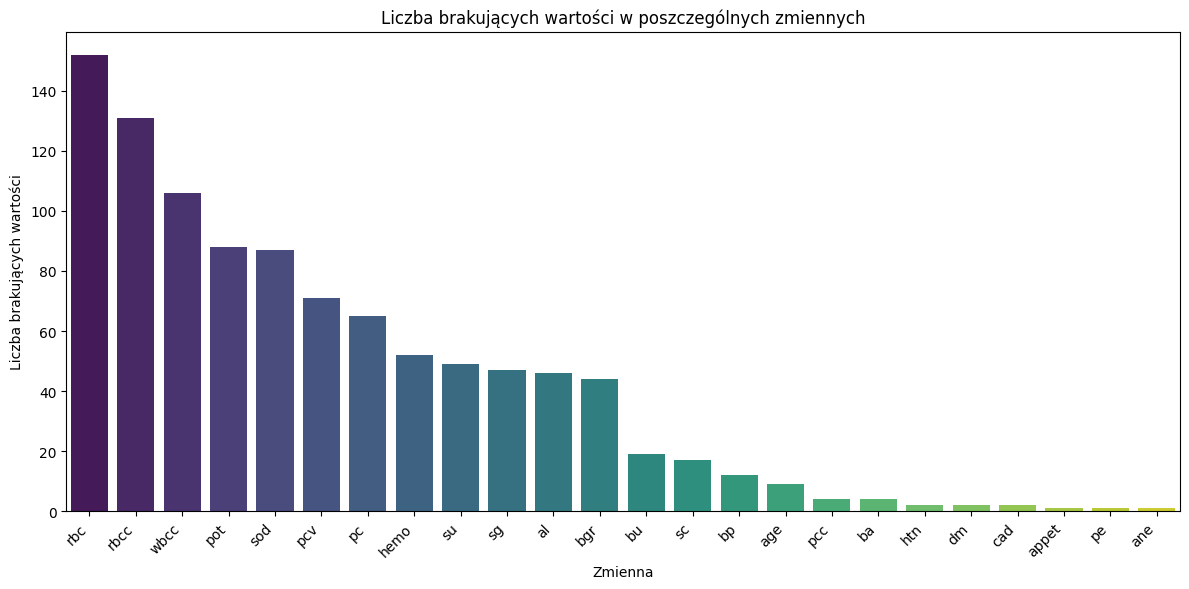

In [ ]:
# Wykres braków danych
plt.figure(figsize=(12,6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zmienna')
plt.ylabel('Liczba brakujących wartości')
plt.title('Liczba brakujących wartości w poszczególnych zmiennych')
plt.tight_layout()
plt.show()

Analiza kompletności danych wykazała, że zbiór zawiera znaczną liczbę brakujących wartości w wielu zmiennych. Największa liczba braków zaobserwowana została w zmiennych rbc (152 brakujące wartości), rbcc (131) oraz wbcc (106), co wskazuje na istotne ubytki danych w kluczowych cechach hematologicznych. Pozostałe zmienne, zarówno liczbowe, jak i kategoryczne, również wykazują różne poziomy niekompletności, przykładowo age - 9 braków, bp - 12, pot - 88 braków.

Występowanie braków danych w tak wielu atrybutach wymaga zastosowania odpowiednich metod imputacji lub innych technik radzenia sobie z niekompletnością, aby uniknąć utraty informacji i zapewnić wiarygodność dalszych analiz. Szczegółowa identyfikacja oraz liczba braków w poszczególnych kolumnach stanowi podstawę do planowania dalszego procesu przygotowania danych.

#### **2.4. Imputacja brakujących danych**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Lista zmiennych numerycznych, które imputujemy iteracyjnie
num_cols = ['age', 'bp', 'bu', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'al', 'su', 'sg', 'bgr','sod','pot']

# Tworzymy imputera iteracyjnego (domyślnie regresor wielowymiarowy)
iter_imputer = IterativeImputer(random_state=42)

# Imputujemy tylko kolumny numeryczne i wstawiamy je z powrotem do df
df[num_cols] = iter_imputer.fit_transform(df[num_cols])

# Lista zmiennych kategorycznych, imputujemy modą
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Sprawdzenie czy nadal są braki
print(df.isnull().sum())

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


W celu uzupełnienia braków danych w zbiorze zastosowano zaawansowaną metodę imputacji iteracyjnej (IterativeImputer) dla zmiennych numerycznych oraz imputację modą dla zmiennych kategorycznych.

Metoda imputacji iteracyjnej polega na wielokrotnym dopasowywaniu modeli regresyjnych, które przewidują brakujące wartości jednej zmiennej na podstawie pozostałych dostępnych cech. Dzięki temu podejściu wykorzystujemy wzajemne zależności pomiędzy zmiennymi, co zazwyczaj prowadzi do lepszych estymacji niż proste metody, takie jak uzupełnianie medianą czy średnią. Ta metoda jest szczególnie efektywna w przypadku danych, które zawierają istotne korelacje między cechami, co ma miejsce w analizowanym zbiorze.

Dla zmiennych kategorycznych uzupełniono braki poprzez zastąpienie ich najczęściej występującą wartością (modą). Jest to powszechnie stosowana metoda w przypadku danych kategorycznych, która pozwala zachować spójność i minimalizować wpływ braków na dalszą analizę.

Po przeprowadzonej imputacji zminimalizowano liczbę brakujących danych, co umożliwiło dalszą, bezproblemową analizę i modelowanie bez konieczności usuwania obserwacji lub cech.

#### **2.5. Obsługa wartości odstających**
Wartości odstające mogą znacząco zniekształcać wyniki analiz i obniżać skuteczność modeli predykcyjnych, zwłaszcza w przypadku algorytmów wrażliwych na ekstremalne obserwacje, takich jak regresja liniowa czy drzewa decyzyjne. Z uwagi na medyczny charakter danych oraz ograniczoną liczbę obserwacji (ok. 400), zdecydowano się nie usuwać rekordów zawierających wartości odstające, lecz zastosować metodę **winsoryzacji**, czyli przycięcia skrajnych wartości.

**Winsoryzacja** polega na zastąpieniu wartości spoza określonego zakresu (tu: powyżej 99. percentyla i poniżej 1. percentyla) wartościami granicznymi. Takie podejście pozwala ograniczyć wpływ ekstremalnych punktów danych bez konieczności odrzucania całych wierszy, co mogłoby prowadzić do istotnego zmniejszenia próbki.

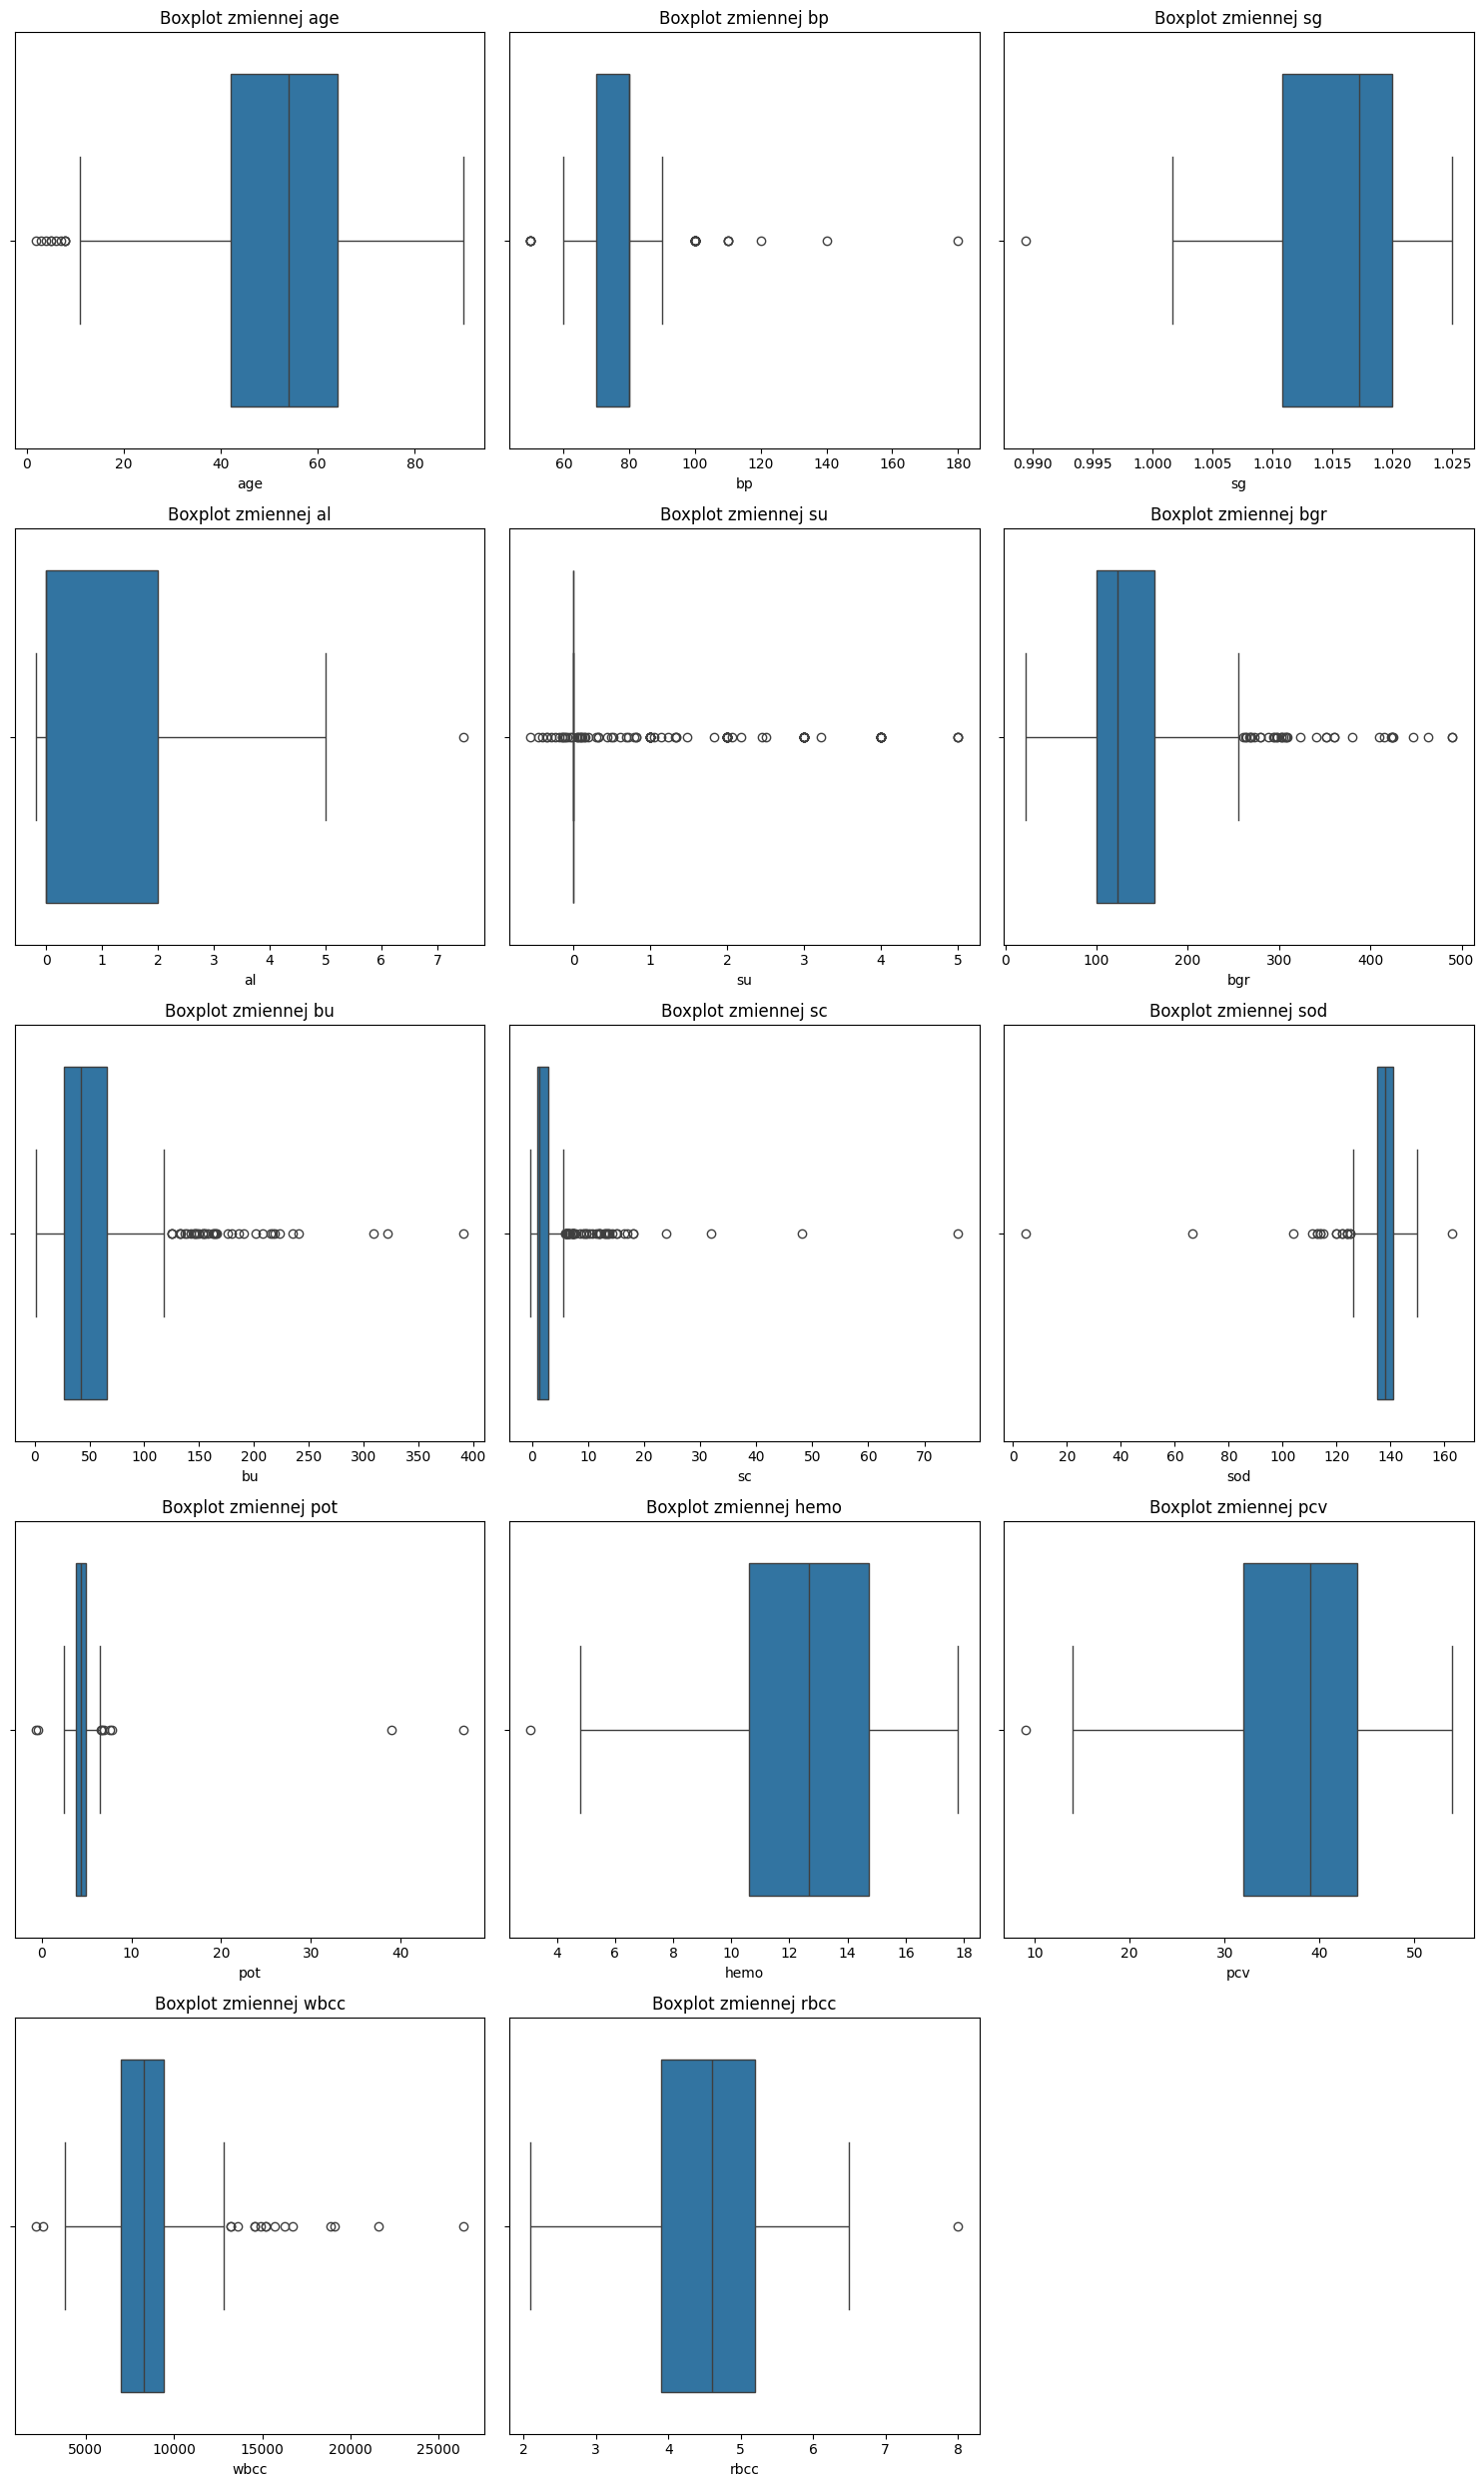

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wybór zmiennych numerycznych
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ustawienia rozmiaru i układu wykresów
plt.figure(figsize=(15, 5 * ((len(num_cols) + 2) // 3)))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot zmiennej {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Na podstawie przeprowadzonej wizualnej analizy wykresów typu **boxplot** oraz statystyk opisowych dla zmiennych numerycznych, zidentyfikowano te cechy, które wykazują znaczną obecność wartości odstających. Kryteria identyfikacji opierały się na dużej różnicy między kwartylami a wartościami ekstremalnymi, wysokim odchyleniu standardowym oraz występowaniu licznych obserwacji oddalonych od większości danych.

Do grupy zmiennych najbardziej podatnych na wartości odstające należą:

* **bp** – ciśnienie krwi (blood pressure),
* **al** – poziom albuminy w moczu (albumin),
* **su** – poziom cukru w moczu (sugar),
* **bgr** – poziom glukozy we krwi (blood glucose random),
* **bu** – poziom mocznika (blood urea),
* **sc** – poziom kreatyniny w surowicy (serum creatinine),
* **sod** – poziom sodu (sodium),
* **wbcc** – liczba białych krwinek (white blood cell count),
* **rbcc** – liczba czerwonych krwinek (red blood cell count).

W celu ograniczenia wpływu tych skrajnych wartości na modelowanie, a jednocześnie zachowania pełnej liczby obserwacji, zdecydowano się na zastosowanie **winsoryzacji** wyłącznie dla wyżej wymienionych zmiennych.

In [ ]:
# Lista zmiennych do winsoryzacji
winsor_vars = ['bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'wbcc', 'rbcc']

def winsorize_series(s, lower_quantile=0.01, upper_quantile=0.99):
    lower = s.quantile(lower_quantile)
    upper = s.quantile(upper_quantile)
    return s.clip(lower=lower, upper=upper)

for var in winsor_vars:
    df[var] = winsorize_series(df[var])

### **2.6. Identyfikacja i usunięcie cech nieinformacyjnych**

**2.6.1. Usuwanie cech o niskiej wariancji**

W trakcie wstępnej eksploracji danych dokonano identyfikacji cech nieinformacyjnych, które charakteryzują się brakiem zmienności, czyli zawierają tę samą wartość dla wszystkich obserwacji. Takie cechy nie wnoszą żadnej wartości analitycznej i mogą negatywnie wpływać na efektywność modeli predykcyjnych, dlatego zazwyczaj są usuwane z dalszej analizy.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Usuwa cechy z wariancją mniejszą niż 0.01
selector.fit(df.select_dtypes(include=[np.number]))  # Tylko cechy numeryczne

low_variance_cols = df.select_dtypes(include=[np.number]).columns[~selector.get_support()]
print(f'Cechy o niskiej wariancji: {list(low_variance_cols)}')

df.drop(columns=low_variance_cols, inplace=True)

Cechy o niskiej wariancji: ['sg']


Podczas analizy zmienności cech zidentyfikowano zmienną `sg` (specific gravity – ciężar właściwy moczu) jako cechę o bardzo niskiej wariancji. Z tego względu podjęto decyzję o jej wykluczeniu z dalszego modelowania.


**2.6.2. Usuwanie cech silnie skorelowanych**

W celu ograniczenia redundancji informacji i uniknięcia problemu wielokolinearności, usunięto cechy silnie skorelowane ze sobą (|r| > 0.9).

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Cechy silnie skorelowane do usunięcia:", to_drop_corr)
df = df.drop(columns=to_drop_corr)

Cechy silnie skorelowane do usunięcia: ['pcv']


Na tej podstawie wykluczono zmienną:

* **pcv** – silnie skorelowaną z hemoglobiną (**hemo**), która została zachowana jako bardziej reprezentatywna.

Dzięki temu zbiór danych jest bardziej zwięzły i lepiej przygotowany do modelowania predykcyjnego.


## **3. Omówienie i wizualizacja zależności w danych**

#### **3.2. Analiza wybranych zmiennych numerycznych**

W celu lepszego zrozumienia struktury danych przeprowadzono analizę rozkładu trzech wybranych zmiennych numerycznych: wieku pacjentów (`age`), poziomu kreatyniny w surowicy (`sc`) oraz poziomu hemoglobiny (`hemo`). Wykorzystano histogramy i wykresy pudełkowe, które pozwalają ocenić rozkład wartości oraz obecność wartości odstających.

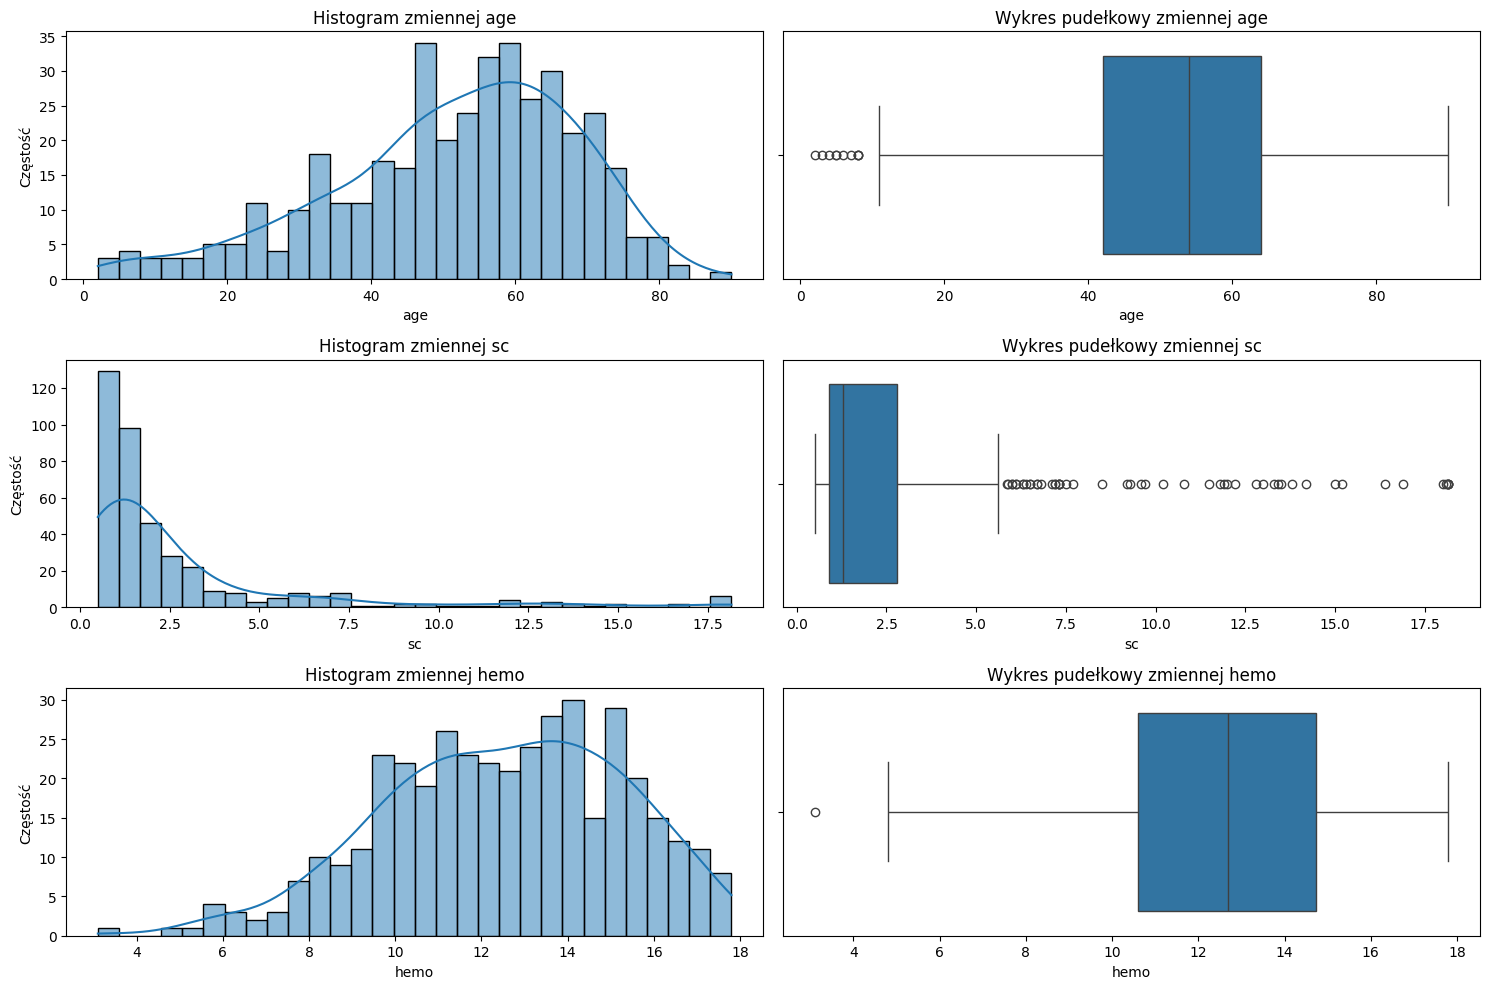

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['age', 'sc', 'hemo']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram zmiennej {col}')
    plt.xlabel(col)
    plt.ylabel('Częstość')

    plt.subplot(3, 2, 2*i)
    sns.boxplot(x=df[col])
    plt.title(f'Wykres pudełkowy zmiennej {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Zmienna `age` (wiek pacjentów)

Histogram zmiennej `age` pokazuje rozkład zbliżony do normalnego z lekkim przesunięciem w prawo. Większość pacjentów ma wiek między 30 a 70 lat, ze szczytem w okolicach 50–60 lat. Na wykresie boxplot widoczne są pojedyncze niskie wartości odstające (pacjenci młodsi niż 20 lat), które ze względu na ich niewielką liczbę nie wymagają dodatkowego traktowania.

### Zmienna `sc` (kreatynina w surowicy)

Histogram dla `sc` wskazuje na silnie prawostronnie skośny rozkład, z większością wartości między 0,5 a 2,0 mg/dL oraz nielicznymi, ale wyraźnymi wartościami odstającymi powyżej 5 mg/dL. Wykres boxplot potwierdza obecność licznych outlierów po prawej stronie rozkładu. W poprzednich etapach analizy została przeprowadzona **winsoryzacja tej zmiennej**, dzięki czemu skrajne wartości zostały ograniczone, minimalizując ich wpływ na dalsze modelowanie, przy zachowaniu pełnej liczby obserwacji.

### Zmienna `hemo` (hemoglobina)

Histogram zmiennej `hemo` ma rozkład bliski normalnemu, z lekką lewostronną skośnością. Dominują wartości w typowym zakresie klinicznym (10–16 g/dL). Na boxplocie widać pojedyncze wartości odstające poniżej 5 g/dL, które jednak nie zaburzają ogólnej charakterystyki zmiennej i nie wymagały stosowania specjalnych metod ograniczania wartości odstających.

---

## **Podsumowanie i wnioski**

* Zmienna `age` wykazuje rozkład zbliżony do normalnego z niewielką liczbą wartości odstających, co sprzyja stabilności modeli i nie wymaga dodatkowej transformacji.
* Zmienna `sc` ma silnie skośny rozkład z wyraźnymi wartościami odstającymi, co wskazuje na konieczność uwzględnienia tej właściwości podczas modelowania.
* Zmienna `hemo` cechuje się rozkładem bliskim normalnemu, co ułatwia interpretację i modelowanie, choć obecność nielicznych wartości odstających może wymagać uwagi przy doborze algorytmów.

Ogólnie, analiza rozkładów i wartości odstających pozwala lepiej dobrać metody modelowania i przetwarzania danych, co wpływa na jakość i wiarygodność predykcji oraz wniosków płynących z analizy.




### **3.3. Macierz korelacji dla zmiennych liczbowych**

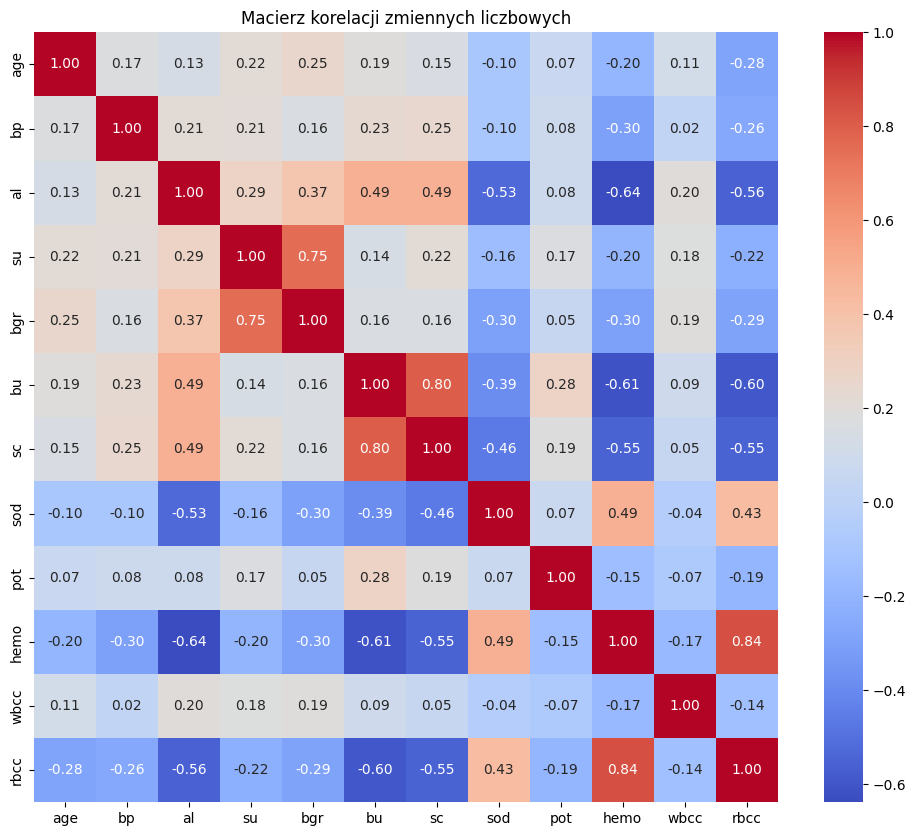

In [ ]:
# Wybór kolumn numerycznych
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji zmiennych liczbowych')
plt.show()

#### **Najważniejsze obserwacje**

1. **Silne dodatnie korelacje:**

   * Występuje bardzo silna dodatnia korelacja między poziomem mocznika we krwi (`bu`) a poziomem kreatyniny (`sc`) – współczynnik **0.80**. Oba parametry są istotnymi wskaźnikami funkcji nerek.
   * Silną korelację dodatnią odnotowano również między poziomem glukozy (`bgr`) a obecnością cukru w moczu (`su`) – **0.75**, co sugeruje potencjalny związek z cukrzycą.
   * Bardzo silna zależność występuje między poziomem hemoglobiny (`hemo`) a liczbą czerwonych krwinek (`rbcc`) – **0.84**, co wynika z bezpośredniego związku biologicznego między tymi parametrami.

2. **Silne ujemne korelacje:**

   * Hemoglobina (`hemo`) wykazuje istotną ujemną korelację z poziomem mocznika (`bu`, **-0.61**) oraz kreatyniny (`sc`, **-0.55**), co może wskazywać na obecność anemii towarzyszącej niewydolności nerek.
   * Albumina (`al`) również koreluje ujemnie z parametrami nerkowymi – szczególnie z `hemo` (**-0.64**) i `sc` (**-0.53**).
   * Liczba erytrocytów (`rbcc`) jest odwrotnie skorelowana z poziomem kreatyniny (**-0.55**) oraz mocznika (**-0.60**), co może potwierdzać pogarszającą się funkcję nerek.

#### **Wnioski**

Analiza korelacji pozwoliła zidentyfikować grupy silnie powiązanych zmiennych, szczególnie tych związanych z funkcją nerek (`bu`, `sc`, `hemo`, `rbcc`, `al`). Tego typu zależności mogą stanowić istotną podstawę do dalszej analizy statystycznej, modelowania predykcyjnego oraz selekcji zmiennych istotnych klinicznie. Wyniki są zgodne z fizjologią i mogą wspierać diagnozę i monitorowanie schorzeń takich jak przewlekła choroba nerek czy cukrzyca.


### **3.4. Wizualna analiza zmiennych numerycznych z podziałem na klasy**

Aby zbadać wzajemne zależności pomiędzy cechami liczbowymi, wygenerowano **macierz wykresów par (pairplot)** dla wybranych zmiennych numerycznych: `age`, `sc` (kreatynina), `hemo` (hemoglobina), `bu` (mocznik) oraz `bgr` (glukoza we krwi). Punkty zostały pokolorowane zgodnie z klasą diagnozy: osoby z przewlekłą chorobą nerek (`ckd`) i osoby zdrowe (`notckd`).

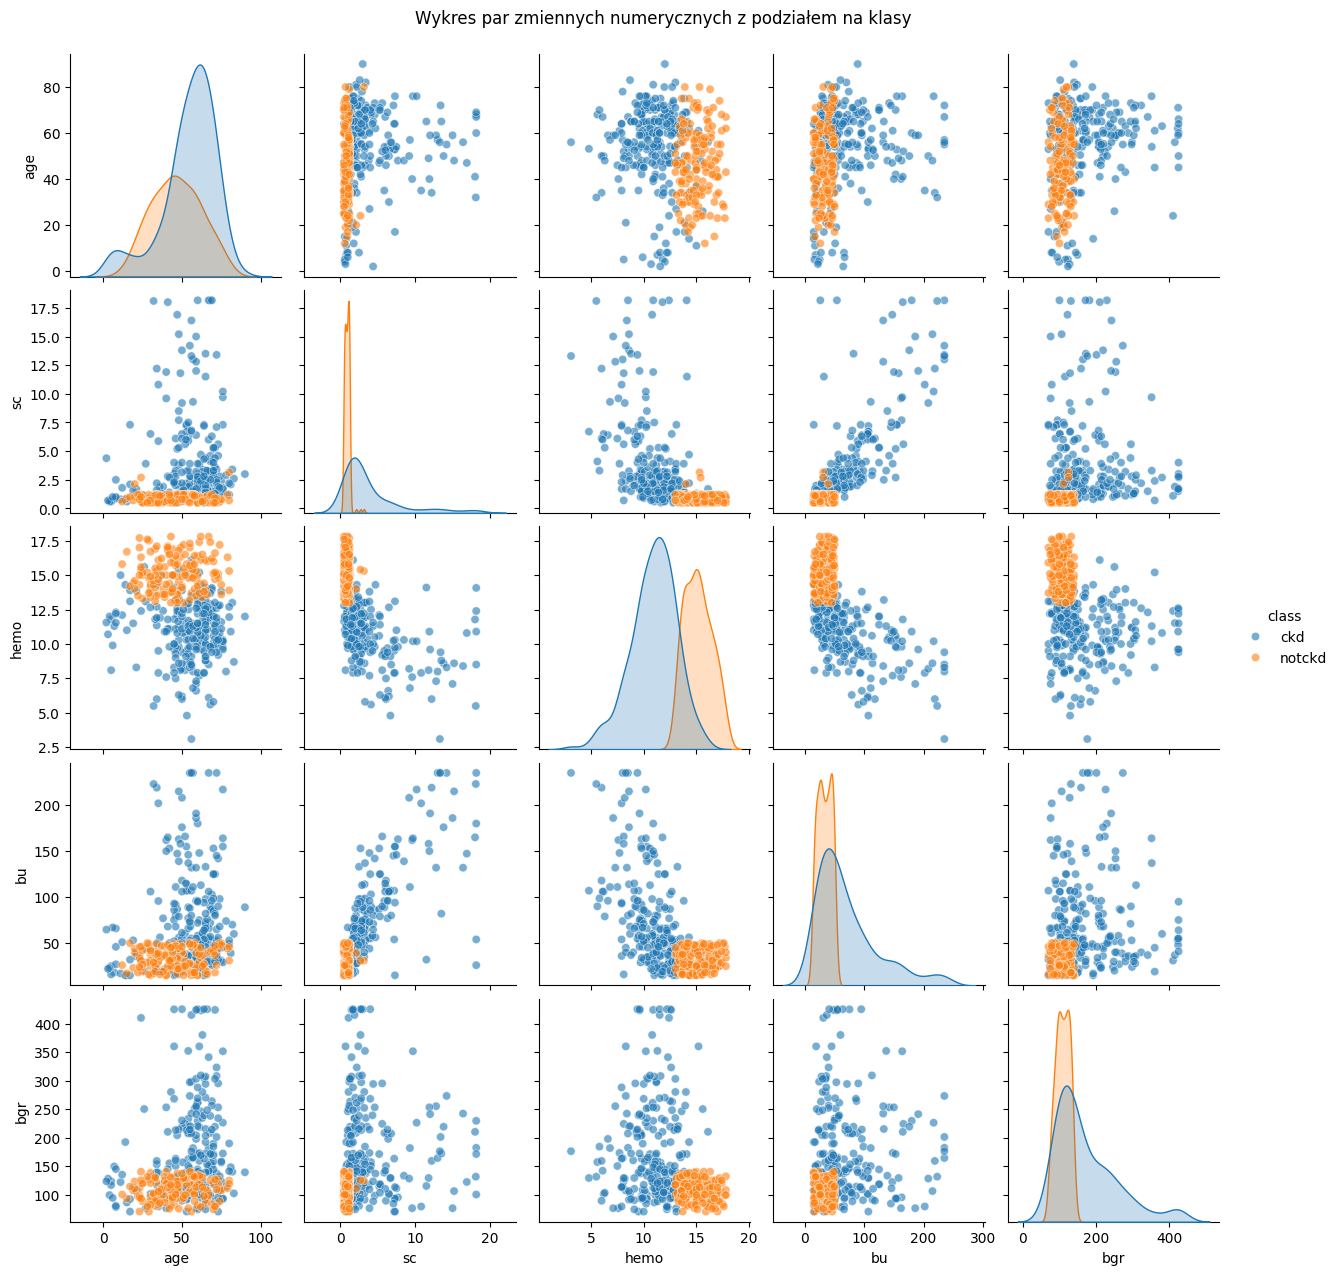

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wybrane kolumny + klasa decyzyjna
cols_to_plot = ['age', 'sc', 'hemo', 'bu', 'bgr', 'class']
pair_df = df[cols_to_plot].dropna()

pair_df['class'] = pair_df['class'].astype(str)
sns.pairplot(pair_df, hue='class', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Wykres par zmiennych numerycznych z podziałem na klasy', y=1.02)

plt.show()

### **Obserwacje ogólne**

1. **Rozkład zmiennych**

   * Osoby z klasą `ckd` mają **szerszy i bardziej rozciągnięty rozkład** dla zmiennych `sc`, `bu` i `bgr` w porównaniu do grupy `notckd`.
   * Dla `hemo` oraz `age` rozkład dla `notckd` jest bardziej skupiony, szczególnie dla `hemo`, gdzie widoczna jest wyraźna separacja klas.

2. **Zależności pomiędzy zmiennymi:**

   * Zmienna **`hemo` (hemoglobina)** wykazuje tendencję do rozróżniania klas: osoby z `ckd` mają niższe wartości hemoglobiny w porównaniu do osób zdrowych.
   * Zmienna **`sc` (kreatynina)** wyraźnie różnicuje klasy – osoby z `ckd` mają znacznie wyższy poziom kreatyniny.
   * Zmienna **`bu` (mocznik)** również wskazuje wyższe wartości u pacjentów `ckd`.
   * W przypadku **`bgr` (glukoza)** widać wiele przypadków `ckd` z podwyższonym poziomem glukozy, ale występuje też większe rozproszenie.

3. **Separacja klas:**

   * Największą separację klas (`ckd` vs. `notckd`) obserwujemy dla par:

     * `sc` vs `hemo`
     * `bu` vs `hemo`
     * `bgr` vs `hemo`
   * Te kombinacje mogą być szczególnie przydatne przy modelowaniu klasyfikacji pacjentów.

#### **Wnioski**

Analiza wykresu par sugeruje, że zmienne `hemo`, `sc`, `bu` i częściowo `bgr` dostarczają istotnych informacji diagnostycznych pozwalających rozróżnić pacjentów z przewlekłą chorobą nerek od osób zdrowych. Wizualna separacja klas na wykresach wskazuje na ich potencjalną przydatność w modelach predykcyjnych i procesie diagnozy.

## **4. Przygotowanie danych do modelowania**

#### **4.1. Standaryzacja zmiennych numerycznych**

W celu ujednolicenia skali zmiennych liczbowych zastosowano standaryzację, która przekształca każdą cechę tak, by miała średnią równą 0 oraz odchylenie standardowe równe 1. Dzięki temu modele takie jak regresja logistyczna, SVM czy k-NN nie są podatne na dominację cech o większych wartościach liczbowych.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Wybór kolumn numerycznych
num_cols = df.select_dtypes(include=['number']).columns

# Standaryzacja
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled[num_cols].head()

,age,bp,al,su,bgr,bu,sc,sod,pot,hemo,wbcc,rbcc
0,-0.206478,0.316463,-0.065672,-0.438485,-0.367008,-0.452435,-0.452002,0.310613,-0.124239,1.042193,-0.260819,0.684045
1,-2.624082,-2.147765,2.212572,-0.438485,0.009921,-0.847720,-0.566465,-1.030292,-0.399233,-0.441384,-1.051867,0.073440
2,0.619045,0.316463,0.693743,2.438245,3.665279,-0.079111,-0.280308,-0.770047,0.094222,-1.056526,-0.392660,-0.853462
3,-0.206478,-0.504946,2.212572,-0.438485,-0.420416,-0.013231,0.292005,-3.781398,-0.715013,-0.477569,-0.744237,-0.726619
4,-0.029580,0.316463,0.693743,-0.438485,-0.567287,-0.672038,-0.394771,-0.284863,-0.282211,-0.332829,-0.480554,0.032969


Standaryzację przeprowadzono z użyciem klasy StandardScaler z biblioteki `sklearn`.

#### **4.2. Mapowanie wartości binarnych na liczby**


W zbiorze występują zmienne reprezentowane tekstowo, np. yes/no, normal/abnormal. Trzeba je przekształcić, mapując na wartości liczbowe lub kategorie.
Zastosowano manualne mapowanie binarne, przypisując jednej wartości 1, a drugiej 0. Przykładowo:
* yes - 1, no - 0
* normal - 1, abnormal - 0

Przekształcono w ten sposób m.in. zmienne: `rbc`, `pc`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `ba`, `pcc`.

In [ ]:
# Mapowanie wartości tekstowych na liczby (0/1)
bin_mapping = {
    'yes': 1, 'no': 0,
    'normal': 1, 'abnormal': 0,
    'present': 1, 'notpresent': 0,
    'good': 1, 'poor': 0
}

# Zmienne kategoryczne binarne
cat_binary_cols = ['rbc', 'pc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane','ba','pcc']

# Zastosowanie mapowania
df_scaled[cat_binary_cols] = df_scaled[cat_binary_cols].replace(bin_mapping)

<ipython-input-23-39deeee5a0fb>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled[cat_binary_cols] = df_scaled[cat_binary_cols].replace(bin_mapping)


Przed przystąpieniem do trenowania modeli uczenia maszynowego sprawdzono, czy wszystkie kolumny zawierają dane w formacie liczbowym.

In [ ]:
non_numeric_cols = df_scaled.select_dtypes(include='object').columns
print("Pozostałe tekstowe kolumny:", non_numeric_cols.tolist())

Pozostałe tekstowe kolumny: ['class']


W wyniku tej operacji uzyskano listę kolumn wymagających dalszego przekształcenia na format numeryczny.

Sprawdzenie unikalnych wartości i liczności w kolumnie `class`

In [ ]:
print("Unikalne wartości w kolumnie 'class':", df_scaled['class'].unique())
print("\nLiczba wystąpień każdej wartości:")
print(df_scaled['class'].value_counts(dropna=False))

Unikalne wartości w kolumnie 'class': ['ckd' 'notckd']

Liczba wystąpień każdej wartości:
class
ckd       250
notckd    150
Name: count, dtype: int64


Zmienna `class`, która reprezentuje obecność przewlekłej choroby nerek (CKD), pierwotnie miała postać tekstową z dwoma wartościami: `ckd` (obecność choroby) oraz `notckd` (brak choroby). Aby umożliwić jej wykorzystanie w modelach uczenia maszynowego, została zakodowana ręcznie na wartości binarne:

In [ ]:
df_scaled['class'] = df_scaled['class'].map({'ckd': 1, 'notckd': 0})

Kolumna class, zawierająca etykiety klas, została przekształcona na format binarny: 1 dla przypadków z przewlekłą chorobą nerek (`ckd`) oraz 0 dla obserwacji bez choroby (`notckd`). Taka forma jest zgodna z wymaganiami algorytmów klasyfikacyjnych i umożliwia prawidłowe trenowanie modeli uczenia maszynowego.

In [ ]:
# Sprawdzenie unikalnych wartości i liczności w kolumnie 'class'
print("Unikalne wartości w kolumnie 'class':", df_scaled['class'].unique())
print("\nLiczba wystąpień każdej wartości:")
print(df_scaled['class'].value_counts(dropna=False))

Unikalne wartości w kolumnie 'class': [1 0]

Liczba wystąpień każdej wartości:
class
1    250
0    150
Name: count, dtype: int64


#### **4.3. Podział na zbiór treningowy i testowy**

Poniżej dokonano podziału danych na zbiór treningowy i testowy w proporcji 80:20.

In [ ]:
from sklearn.model_selection import train_test_split

# Przygotowanie X i y
X = df_scaled.drop(columns='class')
y = df_scaled['class']

# Podział na treningowy i testowy zbiór danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

# Sprawdzenie rozmiarów
print(f"Trening: {X_train.shape}, Test: {X_test.shape}")

Trening: (320, 22), Test: (80, 22)


Dane zostały skutecznie podzielone na dwa podzbiory:
 * zbiór treningowy: 320 obserwacji (80% danych)
 * zbiór testowy: 80 obserwacji (20% danych)

Podczas podziału zastosowano parametry `random_state=42` (dla powtarzalności wyników) oraz `stratify=y` (dla zachowania oryginalnych proporcji klas w obu zbiorach). Taki rozkład jest odpowiedni przy ograniczonej liczbie próbek (400 rekordów) i pozwala zachować wystarczającą ilość danych do nauki modelu, a jednocześnie umożliwia wiarygodną ocenę jego działania na niezależnym zbiorze testowym. Zastosowana strategia zapewnia równowagę pomiędzy jakością trenowania a rzetelnością oceny skuteczności modelu.

### **4.4. Selekcja cech**

W celu poprawy efektywności budowanych modeli predykcyjnych oraz ograniczenia ryzyka nadmiernego dopasowania, przeprowadzono selekcję cech z wykorzystaniem algorytmu Random Forest. Model został najpierw wytrenowany wyłącznie na zbiorze treningowym, aby uniknąć wycieku informacji i zapewnić rzetelną ocenę istotności cech. Następnie, na podstawie wyliczonych przez model wartości ważności, wybrano jedynie te cechy, których istotność przekraczała wartość mediany.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Inicjalizacja modelu RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Dopasowanie modelu tylko na zbiorze treningowym
rf.fit(X_train, y_train)

# Selekcja cech na podstawie ważności (mediany)
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X_train, y_train)

# Wybrane cechy
selected_features = X_train.columns[sfm.get_support()]
print("Wybrane cechy po selekcji:", selected_features.tolist())

# Redukcja zbiorów do wybranych cech
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Wybrane cechy po selekcji: ['bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'rbcc', 'htn', 'dm']


W wyniku selekcji zachowano następujące zmienne:

* **bp** – ciśnienie krwi (blood pressure),
* **al** – poziom albuminy w moczu (albumin),
* **su** – poziom cukru w moczu (sugar),
* **bgr** – poziom glukozy we krwi (blood glucose random),
* **bu** – poziom mocznika we krwi (blood urea),
* **sc** – poziom kreatyniny w surowicy (serum creatinine),
* **sod** – poziom sodu (sodium),
* **hemo** – poziom hemoglobiny (hemoglobin),
* **rbcc** – liczba czerwonych krwinek (red blood cell count),
* **htn** – występowanie nadciśnienia tętniczego (hypertension),
* **dm** – występowanie cukrzycy (diabetes mellitus).

Następnie oba zbiory danych — treningowy i testowy — zostały zredukowane wyłącznie do tych wybranych zmiennych. Dzięki temu skupiono się na cechach najbardziej wpływających na klasyfikację przypadków przewlekłej choroby nerek, co pozwala na uproszczenie modelu i poprawę jego skuteczności. Redukcja liczby zmiennych zwiększa również przejrzystość wyników oraz skraca czas potrzebny na trenowanie i testowanie modeli.



## **5. Eksploracja danych z użyciem ML**
W tej części projektu przeprowadzono eksplorację wybranych modeli klasyfikacyjnych w celu porównania ich działania na zbiorze danych dotyczącym przewlekłej choroby nerek (CKD). Modele zostały wytrenowane na wcześniej przygotowanym zbiorze treningowym. Na tym etapie skupiono się wyłącznie na procesie treningowym, bez szczegółowej oceny skuteczności modeli.

W analizie uwzględniono następujące algorytmy:
* Regresja logistyczna (Logistic Regression)
* Las losowy (Random Forest)
* Maszyna wektorów nośnych (Support Vector Machine — SVM)
* k-najbliższych sąsiadów (k-Nearest Neighbors — k-NN)
* XGBoost / LightGBM


#### **5.1. Regresja logistyczna**

Pierwszym modelem wykorzystanym w analizie była regresja logistyczna(Logistic Regression), będąca klasycznym modelem liniowym stosowanym w problemach klasyfikacyjnych binarnych. Model ten został przetrenowany na zbiorze treningowym bez wcześniejszego dostrajania hiperparametrów. Aby zapewnić zbieżność algorytmu optymalizacji, zwiększono maksymalną liczbę iteracji do 1000.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicjalizacja i trening modelu
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Trening przebiegł bez błędów, a wytrenowany model posłuży w kolejnym etapie do oceny jakości klasyfikacji przypadków CKD.

**Predykcja na zbiorze testowym**

In [ ]:
y_pred_log = log_model.predict(X_test)

Po wytrenowaniu modelu regresji logistycznej dokonano predykcji na niezależnym zbiorze testowym (`X_test`). Celem tego etapu było sprawdzenie, jak model radzi sobie z klasyfikacją przypadków, których wcześniej nie widział. Predykcje zostały zapisane w postaci wektora przewidywanych etykiet klas (0 lub 1).

**Macierz pomyłek**

W celu oceny działania modelu wygenerowano macierz pomyłek (`confusion matrix`), która przedstawia liczbę prawidłowych i błędnych klasyfikacji. Dzięki niej można szybko ocenić, ile przypadków zostało poprawnie zakwalifikowanych jako CKD (1) lub brak CKD (0), a ile pomyłkowo przypisano do niewłaściwej klasy.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_log))

[[30  0]
 [ 5 45]]


Macierz pomyłek dla regresji logistycznej pokazuje, że model skutecznie klasyfikuje przypadki przewlekłej choroby nerek (CKD). Spośród 80 przypadków w zbiorze testowym:

* 30 przypadków zostało prawidłowo zaklasyfikowanych jako brak choroby (`notckd`),
* 45 przypadków zostało poprawnie wykrytych jako `ckd`,
* wystąpiło tylko 5 błędnych klasyfikacji typu false negative (model nie wykrył choroby, mimo że występowała),
* nie odnotowano żadnych błędnych klasyfikacji false positive.

Taki wynik świadczy o wysokiej skuteczności klasyfikatora, szczególnie w zakresie identyfikacji pacjentów bez choroby.

**Kluczowe metryki jakości modelu:**

Wygenerowano raport klasyfikacji zawierający kluczowe metryki jakości modelu: `accuracy`, `precision`, `recall` oraz `F1-score`. Każda z tych metryk została policzona osobno dla klasy `ckd` i `notckd`, co pozwala na wstępną ocenę skuteczności klasyfikatora przed dalszą kalibracją i walidacją w kolejnym etapie analizy.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log, target_names=['notckd', 'ckd']))


              precision    recall  f1-score   support

      notckd       0.86      1.00      0.92        30
         ckd       1.00      0.90      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



Raport klasyfikacji dla regresji logistycznej pokazuje, że model osiąga wysoką skuteczność w rozróżnianiu przypadków `ckd` i `notckd`.

Dla klasy `notckd` (brak choroby) uzyskano precyzję na poziomie 0.86 i 100% czułość (`recall`), co oznacza, że model poprawnie wykrył wszystkie przypadki bez choroby.

Dla klasy `ckd` (choroba obecna) osiągnięto precyzję 1.00 i czułość 0.90, co oznacza, że 90% przypadków z chorobą zostało poprawnie sklasyfikowanych.

Ogólna dokładność modelu wynosi 94%, a wartości `F1-score` przekraczają 0.90 dla obu klas, co potwierdza dobrą równowagę między precyzją i czułością.


---


**Wnioski wskazują**, że regresja logistyczna może być skutecznym modelem bazowym w klasyfikacji przypadków CKD, jednak pewne przypadki z chorobą mogą zostać przeoczone.

**Porównanie wartości rzeczywistych i przewidywanych**

Utworzono tabelę porównującą wartości rzeczywiste (`Actual`) i przewidywane (`Predicted`) dla każdego przypadku w zbiorze testowym. Tego typu wizualne zestawienie pozwala szybko zidentyfikować przypadki, w których model się pomylił oraz zrozumieć potencjalne wzorce błędnej klasyfikacji.

In [ ]:
df_results = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred_log
})
df_results.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


Na podstawie porównania wartości rzeczywistych (`Actual`) i przewidzianych (`Predicted`) przez model regresji logistycznej można zauważyć, że model bardzo dobrze radzi sobie z klasyfikacją przypadków. W analizowanym wycinku danych (pierwsze obserwacje), wszystkie przewidywania są zgodne z rzeczywistymi klasami. Świadczy to o wysokiej trafności modelu i potwierdza wcześniejsze metryki jakości.

#### **5.2. Las losowy**

W ramach eksploracji danych z wykorzystaniem metod uczenia maszynowego przeprowadzono trening modelu Random Forest (Las losowy), który jest zespołową metodą opartą na wielu drzewach decyzyjnych. Do modelu zastosowano 100 drzew (`n_estimators=100`) i ustalono ziarno losowości `random_state=42` w celu zapewnienia powtarzalności wyników.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicjalizacja i trening modelu
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predykcja na zbiorze testowym**

In [ ]:
y_pred_rf = rf_model.predict(X_test)

**Macierz pomyłek**

In [ ]:
print("Macierz pomyłek - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Macierz pomyłek - Random Forest:
[[30  0]
 [ 2 48]]


Model Random Forest wykazał bardzo wysoką skuteczność predykcji.
Z 80 przypadków testowych:

* 30 pacjentów bez przewlekłej choroby nerek (notckd) zostało prawidłowo sklasyfikowanych.
* 48 pacjentów z CKD (`ckd`) zostało również poprawnie rozpoznanych.
* Wystąpiły jedynie 2 błędy typu false negative — model nieprawidłowo zaklasyfikował pacjentów chorych jako zdrowych.
* Brak false positives (model nie oznaczył żadnej zdrowej osoby jako chorej).

Wyniki wskazują na dużą precyzję i trafność klasyfikatora Random Forest.

**Metryki klasyfikacji**

In [ ]:
print("Raport klasyfikacji - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Raport klasyfikacji - Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



* `Precision` (precyzja): 94% dla klasy 0 i 100% dla klasy 1 oznacza, że model
bardzo rzadko myli się, przypisując etykiety.

* `Recall` (czułość): Model prawidłowo wykrył wszystkie przypadki klasy 0 (`notckd`) i 96% przypadków klasy 1 (`ckd`).

* `F1-score`: Wysokie wartości F1 (0.97 i 0.98) świadczą o zrównoważonej skuteczności klasyfikatora.

* `Accuracy` (dokładność): ogólna skuteczność klasyfikacji to 97%.

* `Macro avg` i `Weighted avg` potwierdzają równomiernie wysoką skuteczność w obu klasach, niezależnie od ich liczności.

**Porównanie wartości rzeczywistych i przewidywanych**

In [ ]:
import pandas as pd

comparison_rf = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf
})

comparison_rf.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


Model poprawnie sklasyfikował wszystkie przypadki w tej próbce. Dla pięciu obserwacji przewidywania pokrywają się z rzeczywistymi wartościami klas, co potwierdza skuteczność modelu na tym podzbiorze danych.

#### **5.3. SVM-Maszyna wektorów nośnych**

W celu porównania skuteczności klasyfikatorów, wytrenowano model Support Vector Machine (SVM). Algorytm ten znajduje optymalną hiperpowierzchnię oddzielającą klasy w przestrzeni cech. Do treningu użyto danych treningowych, a predykcje oceniono na zbiorze testowym.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

 **Predykcja na zbiorze testowym**

In [ ]:
y_pred_svm = svm_model.predict(X_test)

**Macierz pomyłek**

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Macierz pomyłek - SVM:")
print(conf_matrix_svm)

Macierz pomyłek - SVM:
[[30  0]
 [ 5 45]]


* Klasyfikator poprawnie zaklasyfikował wszystkie przypadki klasy `notckd` (0)
* 5 przypadków klasy `ckd` (1) zostało błędnie zakwalifikowanych jako `notckd` (0)  
* Pozostałe 45 przypadków klasy `ckd` zostało prawidłowo sklasyfikowanych.

Model wykazuje bardzo dobrą skuteczność klasyfikacji, choć warto zwrócić uwagę na obecność kilku błędnych klasyfikacji klasy pozytywnej.

**Metryki klasyfikacji**

In [ ]:
report_svm = classification_report(y_test, y_pred_svm)
print("Raport klasyfikacji - SVM:")
print(report_svm)

Raport klasyfikacji - SVM:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.90      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



Model SVM osiągnął wysoką skuteczność klasyfikacji — dokładność 94%. Model bardzo dobrze rozpoznaje pacjentów bez choroby nerek (`notckd`) z 100% czułością (`recall`), ale kosztem precyzji w przypadku pacjentów z chorobą nerek (`ckd`), gdzie pojawiło się kilka błędnych klasyfikacji. `F1-score` dla obu klas również wskazuje na dobrze wyważoną wydajność modelu. Świetna precyzja dla klasy `ckd` oznacza, że model niemal nigdy nie wskazuje błędnie tej diagnozy u zdrowych osób.

**Porównanie rzeczywistych i przewidywanych klas**

In [ ]:
comparison_svm = pd.DataFrame({'Actual': y_test.values[:5], 'Predicted': y_pred_svm[:5]})
print(comparison_svm)

   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       0          0
4       1          1


Na podstawie powyższej próbki widać, że model klasyfikuje poprawnie zarówno pacjentów chorych, jak i zdrowych. To potwierdza, że SVM dobrze generalizuje dane testowe. Jednak, jak pokazuje macierz pomyłek wcześniej, w pełnym zbiorze testowym model popełnił 5 błędów przy klasyfikacji pacjentów z `CKD` jako zdrowych.

#### **5.4. k-NN - k-najbliższych sąsiadów**

W kolejnym kroku wykorzystano klasyfikator `k-NN` (k = 5), który przypisuje nowym przykładom klasę na podstawie najczęściej występującej klasy wśród 5 najbliższych sąsiadów w przestrzeni cech.

Model został przetrenowany na zbiorze treningowym, a następnie oceniony na zbiorze testowym.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

**Predykcja na zbiorze testowym**

In [ ]:
y_pred_knn = knn_model.predict(X_test)

**Macierz pomyłek**

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Macierz pomyłek - k-NN:")
print(conf_matrix_knn)

Macierz pomyłek - k-NN:
[[28  2]
 [ 3 47]]


W przypadku modelu k-najbliższych sąsiadów (k-NN) uzyskano następujące wyniki:
* 28 przypadków klasy `notckd` (zdrowi) zostało poprawnie sklasyfikowanych,
* 2 przypadki klasy `notckd` zostały błędnie zaklasyfikowane jako `ckd`(fałszywie pozytywne),
* 47 przypadków klasy `ckd` (chorzy) zostało poprawnie sklasyfikowanych,
*  3 przypadki klasy `ckd` zostały błędnie zaklasyfikowane jako `notckd` (fałszywie negatywne).

**Metryki klasyfikacji**

In [ ]:
report_knn = classification_report(y_test, y_pred_knn)
print("Raport klasyfikacji - k-NN:")
print(report_knn)

Raport klasyfikacji - k-NN:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.96      0.94      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



Model k-NN uzyskał dobre wyniki w klasyfikacji przypadków przewlekłej choroby nerek:

Precyzja (precision):
* dla klasy notckd wyniosła 0.90,
* dla klasy ckd — 0.96, co oznacza, że model rzadko generuje fałszywe alarmy.

Czułość (recall):
* notckd: 0.93,
* ckd: 0.94,
czyli większość przypadków obu klas została poprawnie rozpoznana.

F1-score (średnia harmoniczna precyzji i czułości):
* notckd: 0.92,
* ckd: 0.95,
świadczy o wysokiej równowadze między precyzją a czułością.

Accuracy (dokładność ogólna): 94%, co oznacza, że 94% przypadków w zbiorze testowym zostało sklasyfikowanych poprawnie.

Model k-NN pokazuje się jako solidna metoda klasyfikacji w tym problemie.



**Porównanie kilku pierwszych przykładów**

In [ ]:
comparison_knn = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_knn})
print(comparison_knn.head())

   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       0          0
4       1          1


Dla przedstawionej próbki pięciu obserwacji model `k-NN` poprawnie sklasyfikował wszystkie przypadki. Przewidywania pokrywają się z rzeczywistymi klasami.


#### **5.5. XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Predykcja na zbiorze testowym**

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

**Macierz pomyłek**

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Macierz pomyłek - XGBoost:")
print(cm_xgb)

Macierz pomyłek - XGBoost:
[[29  1]
 [ 2 48]]


* Spośród 30 przypadków klasy `notckd` (brak choroby nerek), model poprawnie zaklasyfikował 29, a 1 przypadek błędnie jako `ckd`.

* Spośród 50 przypadków klasy `ckd` (choroba nerek), 48 zostało poprawnie przewidzianych, a 2 błędnie zaklasyfikowane jako `notckd`.

**Metryki klasyfikacji**

In [ ]:
print("\nRaport klasyfikacji - XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Raport klasyfikacji - XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.98      0.96      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



Dokładność ogólna (`accuracy`): 96% – oznacza, że 96% obserwacji ze zbioru testowego zostało prawidłowo sklasyfikowanych.

Precyzja (`precision`):
* Klasa 0 (`notckd`): 94%

* Klasa 1 (`ckd`): 98%
Oznacza to, że większość przewidywań pozytywnych (np. `ckd`) była trafna.

Czułość - `Recall`:
* Klasa 0 (`notckd`): 97%
* Klasa 1 (`ckd`): 96%
Model dobrze rozpoznaje zarówno przypadki choroby, jak i jej brak.

`F1-score`: Wysokie wartości (0.95, 0.97) potwierdzają równowagę między precyzją a czułością.

**Porównanie wartości rzeczywistych i przewidywanych**

In [ ]:
results_xgb = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_xgb})
print("\nPorównanie wartości rzeczywistych i przewidywanych:")
print(results_xgb.head())


Porównanie wartości rzeczywistych i przewidywanych:
   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       0          0
4       1          1


Model prawidłowo sklasyfikował wszystkie z prezentowanych przypadków.



---
 **Wniosek:**

W ramach eksploracji danych zaimplementowano i przetestowano pięć różnych algorytmów klasyfikacyjnych: regresję logistyczną (Logistic Regression), las losowy (Random Forest), maszynę wektorów nośnych (SVM), metodę k-najbliższych sąsiadów (k-NN) oraz XGBoost.

Wszystkie modele osiągnęły wysoką skuteczność, jednak najlepsze rezultaty uzyskano dla algorytmu **Random Forest** oraz **XGBoost**, które wykazały się najwyższą dokładnością oraz zrównoważonymi metrykami klasyfikacji (`precision`,  `recall`,  `F1-score` ).

## **6. Ewaluacja i kalibracja modeli**

#### **6.1. Metryki**

W tym rozdziale przeprowadzono ocenę skuteczności modeli klasyfikacyjnych na podstawie różnych metryk oraz dokonano ich kalibracji, by uzyskać jeszcze lepsze wyniki predykcji.

Przeprowadzono porównanie wszystkich wytrenowanych wcześniej modeli klasyfikacyjnych na podstawie czterech kluczowych metryk:
* `Accuracy` (dokładność)
* `Precision` (precyzja)
* `Recall` (czułość)
* `F1-score` – średnia harmoniczna `precision` i `recall`

Dla każdego modelu obliczono wartości metryk na zbiorze testowym. Dane zebrano w jednej tabeli w celu przejrzystego porównania skuteczności wszystkich algorytmów.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models_predictions = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "k-NN": y_pred_knn,
    "XGBoost": y_pred_xgb
}

# Tworzenie list do tabeli
results = []

for model_name, y_pred in models_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": round(acc, 2),
        "Precision": round(prec, 2),
        "Recall": round(rec, 2),
        "F1-Score": round(f1, 2)
    })

# Tworzenie i wyświetlenie tabeli
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.97,1.00,0.96,0.98
1,XGBoost,0.96,0.98,0.96,0.97
2,Logistic Regression,0.94,1.00,0.90,0.95
3,SVM,0.94,1.00,0.90,0.95
4,k-NN,0.94,0.96,0.94,0.95


* Najwyższe wartości `F1-score` uzyskał model Random Forest (0.98), co świadczy o najlepszym dopasowaniu tego klasyfikatora do danych.

* `XGBoost` również osiągnął bardzo wysoki wynik (0.97) i charakteryzował się znakomitym balansem między `precision` i `recall`.

* Modele Logistic Regression i SVM miały perfekcyjną precyzję (1.00), jednak ich niższy `recall` (0.90) oznacza, że nie wszystkie przypadki choroby zostały wykryte.

* Model k-NN również osiągnął solidne wyniki, ale nie wyróżniał się znacząco na tle pozostałych.

W oparciu o powyższe metryki można uznać, że **Random Forest** oraz **XGBoost** są najlepszymi kandydatami do wdrożenia lub dalszej kalibracji w kontekście predykcji przewlekłej choroby nerek (CKD).

#### **6.2. Macierz pomyłek**

Poniższy zestaw wykresów przedstawia macierze pomyłek dla każdego z pięciu przetestowanych modeli: Logistic Regression, Random Forest, SVM, k-NN oraz XGBoost. Macierz pomyłek pozwala szczegółowo zobaczyć, ile przypadków każdej klasy (chory – 1, zdrowy – 0) zostało sklasyfikowanych poprawnie, a ile błędnie.

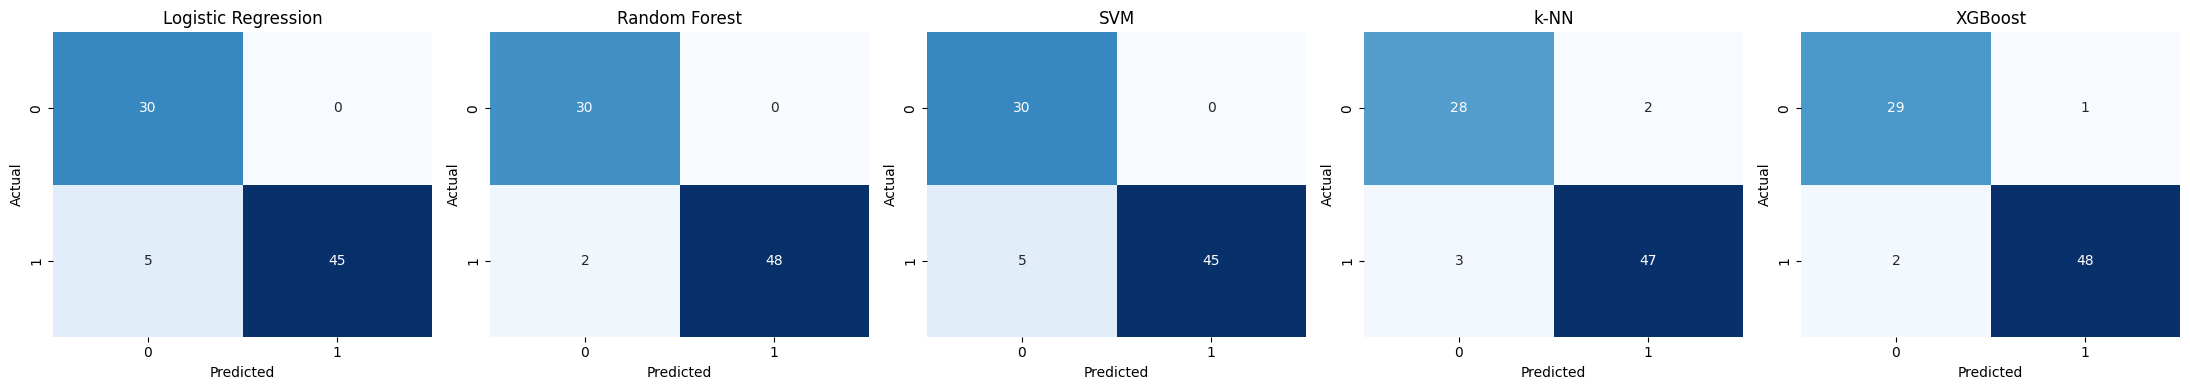

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_predictions = {
    'Logistic Regression': y_pred_log,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'k-NN': y_pred_knn,
    'XGBoost': y_pred_xgb
}

fig, axes = plt.subplots(1, 5, figsize=(22, 4))
for ax, (model_name, y_pred) in zip(axes, model_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


Logistic Regression i SVM:
* Nie pomyliły żadnego zdrowego pacjenta.
* 5 razy nie wykryły choroby u chorego (5 błędów).

Random Forest:
* Żadnego błędu przy zdrowych.
* Tylko 2 błędy u chorych – najlepszy wynik.

k-NN:
* 2 razy pomylił zdrowego z chorym.
* 3 razy nie wykrył choroby.

XGBoost:

* 1 błąd u zdrowego.
* 2 błędy u chorych.


**Wniosek:**
Z analizy macierzy pomyłek wynika, że **Random Forest** i **XGBoost** najskuteczniej klasyfikują przypadki choroby i jej brak. Mają najmniejszą liczbę błędów typu false negative, co jest szczególnie ważne w zastosowaniach medycznych, gdzie pominięcie choroby może mieć poważne konsekwencje.

#### **6.3. Wykresy ROC i Precision-Recall**

**Wykres ROC**

Na wykresie ROC porównano pięć modeli klasyfikacyjnych pod kątem ich zdolności do rozróżniania pacjentów chorych i zdrowych w różnych progach decyzyjnych. Powierzchnia pod krzywą (AUC – Area Under Curve) została obliczona dla każdego z nich. Im wyższa wartość AUC, tym lepsze ogólne działanie modelu.

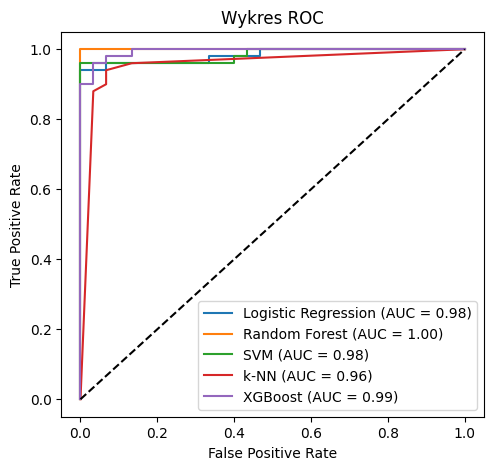

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

models_proba = {
    "Logistic Regression": log_model.predict_proba(X_test)[:, 1],
    "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    "SVM": svm_model.predict_proba(X_test)[:, 1],
    "k-NN": knn_model.predict_proba(X_test)[:, 1],
    "XGBoost": xgb_model.predict_proba(X_test)[:, 1]
}

plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
for name, y_score in models_proba.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Wykres ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()


* Random Forest uzyskał idealny wynik AUC = 1.00, co oznacza perfekcyjną zdolność rozróżniania klas.

* XGBoost osiągnął wynik AUC = 0.99, również wskazujący na niemal doskonałą jakość klasyfikacji.

* Logistic Regression oraz SVM uzyskały bardzo dobre wyniki (AUC = 0.98), co potwierdza ich wysoką trafność.

* k-NN osiągnął najniższy, ale nadal solidny wynik AUC = 0.96.

Wszystkie modele wykazują bardzo wysoką zdolność do rozróżniania klas, jednak **Random Forest** i **XGBoost** wyróżniają się jako najbardziej skuteczne.

**Wykres Precision-Recall**

Wykres Precision-Recall ilustruje zależność między precyzją (Precision) a czułością (Recall) dla różnych progów decyzyjnych każdego z modeli. Jest szczególnie użyteczny przy analizie danych z niezrównoważonymi klasami.

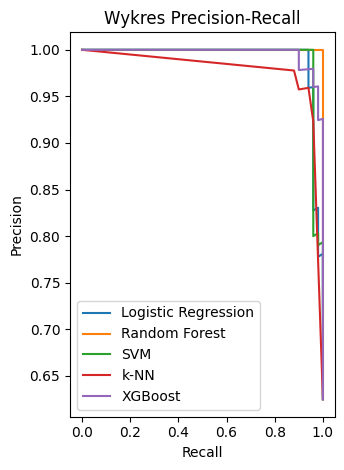

In [ ]:
# Precision-Recall
plt.subplot(1, 2, 2)
for name, y_score in models_proba.items():
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision, label=name)
plt.title("Wykres Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()


* Random Forest i XGBoost osiągnęły bardzo wysokie wartości zarówno precision, jak i recall przez cały zakres progów, co potwierdza ich wysoką jakość.

* Logistic Regression i SVM również uzyskują świetne wyniki, jednak wykazują nieco większy spadek precyzji przy wyższej czułości.

* k-NN posiada najbardziej niestabilną krzywą – jego precision spada szybciej, co może wskazywać na mniejszą odporność modelu przy wyższych wartościach `recall`.

Najbardziej stabilne i skuteczne modele pod względem relacji precision–recall to **Random Forest** i **XGBoost**.

#### **6.4. Kalibracja modelu**

W celu zwiększenia skuteczności działania modelu **Random Forest** przeprowadzono kalibrację hiperparametrów za pomocą metody `GridSearchCV`. Celem tego procesu jest znalezienie najlepszych ustawień modelu, które maksymalizują jego wydajność na podstawie walidacji krzyżowej.

Domyślne wartości parametrów często nie są optymalne dla konkretnego zbioru danych. `GridSearchCV` automatycznie przeszukuje różne kombinacje parametrów i wybiera te, które najlepiej sprawdzają się na danych treningowych.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parametry do przeszukania
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicjalizacja modelu
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Trening z użyciem danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Najlepszy model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Najlepsze parametry: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



Zakres testowanych hiperparametrów obejmował:
* n_estimators: [50, 100, 150] — liczba drzew w lesie,

* max_depth: [None, 5, 10] — maksymalna głębokość drzewa,

* min_samples_split: [2, 5] — minimalna liczba próbek potrzebna do podziału węzła,

* min_samples_leaf: [1, 2] — minimalna liczba próbek w liściu.

Liczba przetestowanych kombinacji: 36, z czego dla każdej wykonano 5-fold cross-validation (łącznie 180 treningów).

##### **6.4.1. Trenowanie najlepszego modelu**

Następnie model ponownie wytrenowano i oceniono jego skuteczność.

Raport klasyfikacji (po kalibracji):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.96      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

Macierz pomyłek:
[[30  0]
 [ 2 48]]


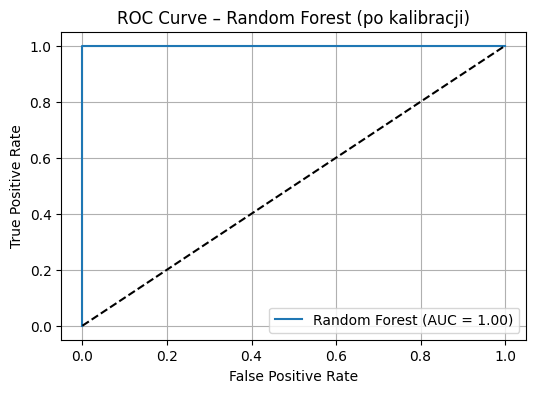

In [ ]:
# Trenowanie najlepszego modelu
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predykcja i metryki
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Raport klasyfikacji i macierz
print("Raport klasyfikacji (po kalibracji):")
print(classification_report(y_test, y_pred_best_rf))
print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred_best_rf))

# Wykres ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_best_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_best_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest (po kalibracji)')
plt.legend()
plt.grid(True)
plt.show()

Po kalibracji modelu `Random Forest` przy użyciu `GridSearchCV` uzyskano taki sam wynik jak przed optymalizacją: dokładność 97%, `F1-score` = 0.98 oraz `AUC` = 1.00. Taki rezultat oznacza, że już początkowa wersja modelu była bardzo dobrze dopasowana do danych. Kalibracja jedynie potwierdziła, że domyślnie dobrane parametry są optymalne dla analizowanego zbioru.

Mimo braku zmiany w wynikach klasyfikacji, przeprowadzenie kalibracji było zasadne — pozwoliło upewnić się, że model nie był przetrenowany i jego skuteczność nie była dziełem przypadku.

**Wizualizacja drzewa decyzyjnego**

In [ ]:
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


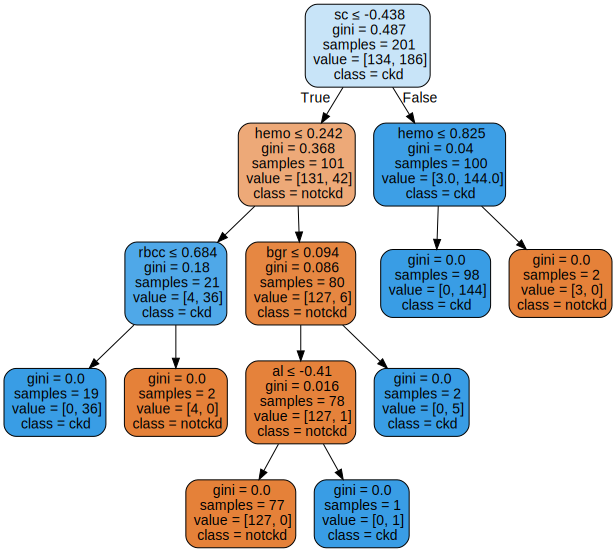

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Wybieramy jedno z drzew z lasu losowego
tree_estimator = best_rf.estimators_[0]

# Eksport drzewa do formatu DOT
dot_data = export_graphviz(tree_estimator,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=['notckd', 'ckd'],
                           rounded=True,
                           filled=True,
                           special_characters=True)

# Wyświetlenie drzewa
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # zapis do pliku
graph  # wyświetlenie w notebooku

Drzewo przedstawia sposób, w jaki model klasyfikacyjny podejmuje decyzje na podstawie zmiennych medycznych. Każdy węzeł (prostokąt) reprezentuje jedno pytanie (warunek).
Co oznaczają pola w węzłach?
* gini – wartość współczynnika czystości; im bliżej 0, tym bardziej jednorodne klasy w danym węźle.

* samples – liczba obserwacji, które dotarły do danego węzła.

* value – rozkład klas (np. [127, 0] = 127 przypadków klasy „notckd”).

* class – przewidywana klasa w tym węźle.

Pierwszy podział odbywa się na podstawie poziomu kreatyniny (`sc`), który jest najważniejszą zmienną.

##### **6.4.2 Najważniejsze zmienne predykcyjne**

W analizie danych z użyciem modeli klasyfikacyjnych istotne jest zidentyfikowanie zmiennych, które mają największy wpływ na przewidywanie klasy.

Określenie najważniejszych cech pozwala:

* lepiej zrozumieć mechanizmy decyzyjne modelu,

* wspomaga interpretowalność wyników dla lekarzy,

* zwiększa trafność diagnostyki — pozwala skupić się na kluczowych parametrach zdrowotnych pacjenta.



   Feature  Importance
7     hemo    0.371829
1       al    0.146149
5       sc    0.121817
8     rbcc    0.121386
9      htn    0.052988
3      bgr    0.052513
10      dm    0.047503
4       bu    0.037735
6      sod    0.026808
0       bp    0.012831


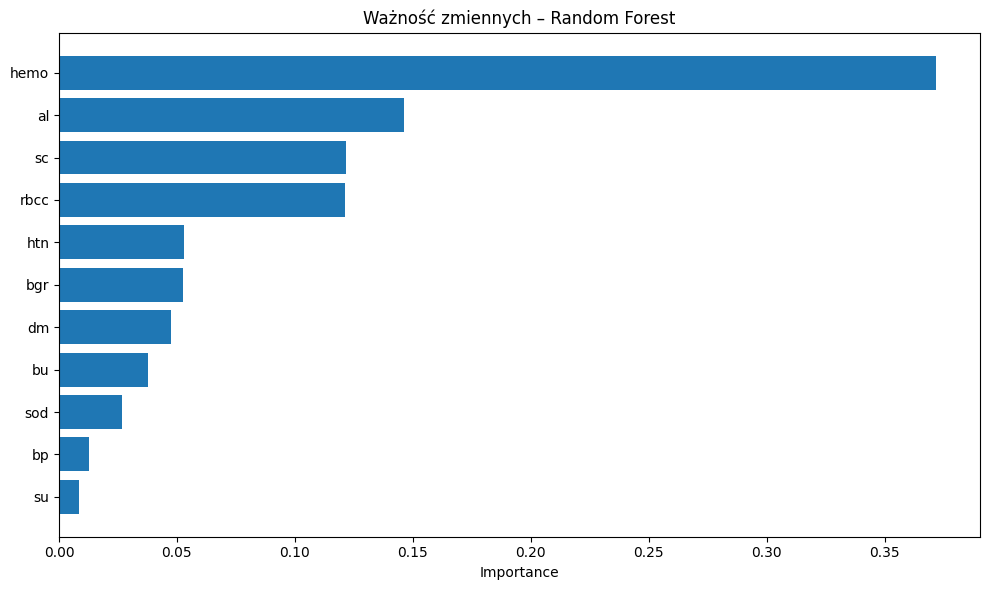

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sprawdzenie ważności cech w dopasowanym modelu Random Forest
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Tworzenie DataFrame i sortowanie
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Wyświetlenie najważniejszych zmiennych
print(importance_df.head(10))

# Wykres
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Ważność zmiennych – Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


Na podstawie wartości `feature_importance_` uzyskanych z modelu Random Forest, największy wpływ na klasyfikację przypadków przewlekłej choroby nerek (CKD) miały następujące cechy:

* `hemo` (stężenie hemoglobiny) – 0.37.
Najsilniejszy predyktor — niski poziom hemoglobiny często towarzyszy niewydolności nerek.

* `al` (obecność albumin w moczu) – 0.15. Obecność białka w moczu to jedno z podstawowych kryteriów diagnozy CKD.

* `sc` (poziom kreatyniny w surowicy) – 0.12. Kreatynina jest bezpośrednim wskaźnikiem filtracji kłębuszkowej.

* `rbcc` (liczba czerwonych krwinek) – 0.12. Choroby nerek mogą wpływać na liczbę erytrocytów.

* `htn` (nadciśnienie) – 0.05. Częsty objaw i jednocześnie czynnik ryzyka chorób nerek.

Pozostałe zmienne, takie jak `bgr` (glukoza), `dm` (cukrzyca), `bu` (mocznik), czy `sod` (sód), również wnosiły informację do modelu, ale ich wpływ był mniejszy.

## **7. Podsumowanie i wnioski**

#### **7.1. Zakres przeprowadzonych działań**

**Celem projektu** była identyfikacja pacjentów z przewlekłą chorobą nerek (CKD) na podstawie danych klinicznych, z wykorzystaniem metod eksploracji danych oraz uczenia maszynowego. W tym celu przeprowadzono pełen proces analityczny obejmujący następujące etapy:

1. **Czyszczenie danych i imputacja**

  * Usunięto błędy tekstowe i brakujące wartości – zastosowano imputację iteracyjną dla danych liczbowych oraz modę dla kategorycznych.

2. **Standaryzacja i kodowanie zmiennych**
  * Dane liczbowe zostały przeskalowane (`StandardScaler`), a zmienne tekstowe zakodowano binarnie, co umożliwiło użycie modeli ML.
3. **Selekcja cech**
  * Wykorzystano model Random Forest do wyboru najbardziej istotnych zmiennych – m.in. `hemo`, `sc`, `al`, `rbcc`, `htn` – co zwiększyło przejrzystość modelu i jego skuteczność.

4. **Budowa i porównanie modeli**
  * Przetestowano 5 klasyfikatorów: Logistic Regression, Random Forest, SVM, k-NN i XGBoost. Modele oceniono za pomocą metryk takich jak `accuracy`,`precision`, `recall`, `F1-score`.

5. **Kalibracja modelu**
  * Przeprowadzono `GridSearchCV` dla Random Forest, co potwierdziło, że domyślne parametry już zapewniały optymalną skuteczność.

#### **7.2. Główne wyzwania**

Projekt napotkał kilka istotnych trudności:

* Braki danych w wielu zmiennych, zwłaszcza hematologicznych (`rbcc`, `wbcc`), co wymagało dokładnej imputacji;

* Mały zbiór danych (400 obserwacji), co ograniczało możliwość stosowania bardziej złożonych modeli;

* Niejednorodne dane kategoryczne, np. błędne zapisy typu `\tno` czy `ckd\t`, które utrudniały analizę;

* Obecność silnych korelacji pomiędzy cechami, co wymagało redukcji wymiaru (np. usunięcie `pcv`);

* Wartości odstające w zmiennych medycznych, takich jak kreatynina czy glukoza, które mogły zaburzać wyniki modelu.



#### **7.3. Najlepiej działający model**

Na podstawie przeprowadzonych analiz, metryk jakości oraz krzywych ROC i Precision-Recall, najlepszym modelem okazał się **Random Forest**. Zarówno przed, jak i po kalibracji model osiągnął najwyższe wyniki:

* `F1-score` = 0.98

* `Accuracy` = 0.97

* `AUC` = 1.00

* Brak błędów przy klasyfikacji zdrowych pacjentów, tylko 2 błędy przy chorych

Kalibracja potwierdziła trafność wcześniej dobranych parametrów i wykazała, że model jest stabilny oraz dobrze dopasowany do danych.

Pozostałe modele (Logistic Regression, SVM,k-NN) również uzyskały bardzo dobre wyniki (`F1-score` ≈ 0.94), jednak nieco gorsze w zakresie wykrywalności choroby.

#### **7.4. Możliwe zastosowania praktyczne**

Opracowany model może być wykorzystany jako narzędzie wspomagające decyzje diagnostyczne w opiece zdrowotnej — w:

* systemach wczesnego ostrzegania przed chorobą nerek,

* wspomaganiu lekarzy w klasyfikacji ryzyka CKD,

* badaniach przesiewowych populacji w kierunku niewydolności nerek.

Model oparty na danych wejściowych od pacjenta może szybko i skutecznie ocenić ryzyko zachorowania, co sprzyja wcześniejszemu wykryciu i leczeniu.